## In Vitro Validation with kinase hotspot

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def sigmoidal_curve(x, a, b, c):
    y = c / (1 + np.exp(-a*(x-b)))
    return y

### BRAF

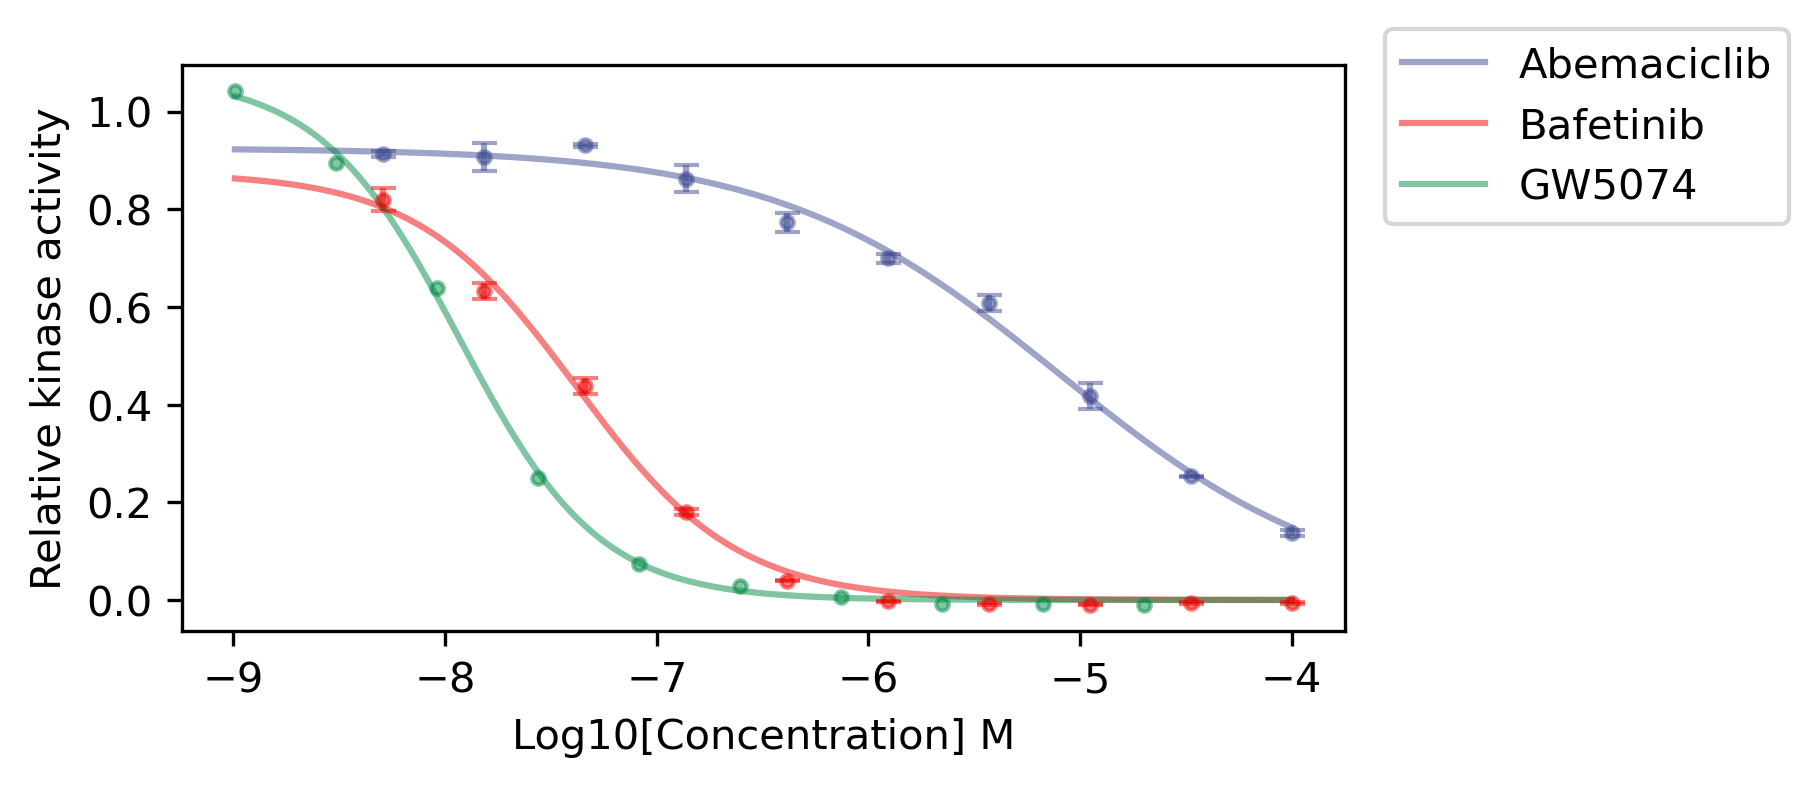

In [2]:
raw_data_braf = pd.read_excel('kinase_hotspot/kinase_hotspot.xlsx', sheet_name=0)

x_abem = np.log10(np.array(raw_data_braf.iloc[:-1,0]).astype(float))
y_abem = np.array(raw_data_braf.iloc[:-1,1:4]).astype(float) / np.array(raw_data_braf.iloc[-1,1:4]).astype(float)
y_abem_mean = np.mean(y_abem, axis = 1)
y_abem_sd = np.std(y_abem, axis = 1)

x_bafe = np.log10(np.array(raw_data_braf.iloc[:-1,0]).astype(float))
y_bafe = np.array(raw_data_braf.iloc[:-1,4:7]).astype(float) / np.array(raw_data_braf.iloc[-1,4:7]).astype(float)
y_bafe_mean = np.mean(y_bafe, axis = 1)
y_bafe_sd = np.std(y_bafe, axis = 1)

x_gw50 = np.log10(np.array(raw_data_braf.iloc[:-1,-1]).astype(float))
y_gw50 = np.array(raw_data_braf.iloc[:-1,7]).astype(float) / np.array(raw_data_braf.iloc[-1,7]).astype(float)

popt1, pcov1 = curve_fit(sigmoidal_curve, list(x_abem), list(y_abem_mean), maxfev=10000)
popt2, pcov2 = curve_fit(sigmoidal_curve, list(x_bafe), list(y_bafe_mean), maxfev=10000)
popt3, pcov3 = curve_fit(sigmoidal_curve, list(x_gw50), list(y_gw50), maxfev=10000)

start = min(np.min(x_abem), np.min(x_gw50))
end = max(np.max(x_abem), np.max(x_gw50))
x0 = np.arange(start, end, 0.001)

plt.figure(figsize=(5, 2.5), dpi=300)
plt.plot(x0, sigmoidal_curve(x0, *popt1), label='Abemaciclib', color='#3B49927F')
plt.plot(x0, sigmoidal_curve(x0, *popt2), label='Bafetinib', color='#EE00007F')
plt.plot(x0, sigmoidal_curve(x0, *popt3), label='GW5074', color='#008B457F')
plt.errorbar(x_abem, y_abem_mean, yerr=y_abem_sd, fmt='.', capsize=3, color='#3B49927F')
plt.errorbar(x_bafe, y_bafe_mean, yerr=y_bafe_sd, fmt='.', capsize=3, color='#EE00007F')
plt.plot(x_gw50, y_gw50, '.', color='#008B457F')

plt.legend(bbox_to_anchor = (1.4, 1.1), loc = 1)
plt.xlabel("Log10[Concentration] M")
plt.ylabel("Relative kinase activity")
plt.show()

In [3]:
# Extract the IC50 value
ic50_1 = 10 ** popt1[1] * 10 ** 9
ic50_2 = 10 ** popt2[1] * 10 ** 9
ic50_3 = 10 ** popt3[1] * 10 ** 9

# Print the IC50 value
print("Abemaciclib IC50 = {:.2f} nM".format(ic50_1))
print("Bafetinib IC50 = {:.2f} nM".format(ic50_2))
print("GW5074 IC50 = {:.2f} nM".format(ic50_3))

Abemaciclib IC50 = 7976.04 nM
Bafetinib IC50 = 41.61 nM
GW5074 IC50 = 11.66 nM


### CSNK2A2

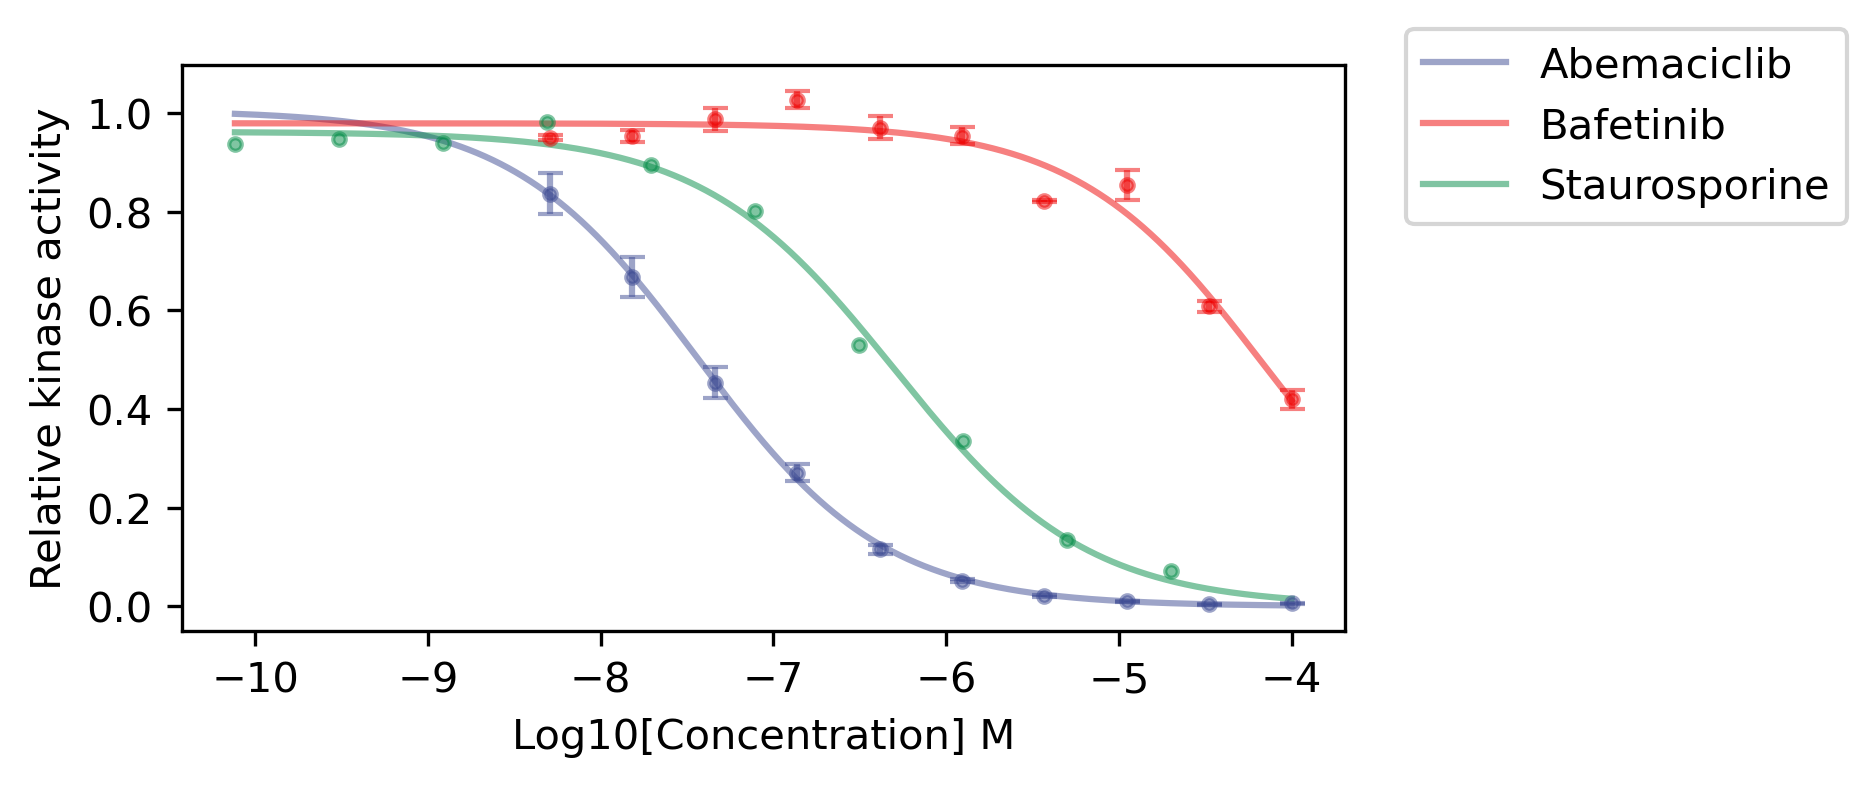

In [4]:
raw_data_ck2 = pd.read_excel('kinase_hotspot/kinase_hotspot.xlsx', sheet_name=1)

x_abem = np.log10(np.array(raw_data_ck2.iloc[:-1,0]).astype(float))
y_abem = np.array(raw_data_ck2.iloc[:-1,1:4]).astype(float) / np.array(raw_data_ck2.iloc[-1,1:4]).astype(float)
y_abem_mean = np.nanmean(y_abem, axis = 1)
y_abem_sd = np.nanstd(y_abem, axis = 1)

x_bafe = np.log10(np.array(raw_data_ck2.iloc[:-1,0]).astype(float))
y_bafe = np.array(raw_data_ck2.iloc[:-1,4:7]).astype(float) / np.array(raw_data_ck2.iloc[-1,4:7]).astype(float)
y_bafe_mean = np.nanmean(y_bafe, axis = 1)
y_bafe_sd = np.nanstd(y_bafe, axis = 1)

x_staur = np.log10(np.array(raw_data_ck2.iloc[:-1,-1]).astype(float))
y_staur = np.array(raw_data_ck2.iloc[:-1,7]).astype(float) / np.array(raw_data_ck2.iloc[-1,7]).astype(float)

popt1, pcov1 = curve_fit(sigmoidal_curve, list(x_abem), list(y_abem_mean), maxfev=10000)
popt2, pcov2 = curve_fit(sigmoidal_curve, list(x_bafe), list(y_bafe_mean), maxfev=10000)
popt3, pcov3 = curve_fit(sigmoidal_curve, list(x_staur), list(y_staur), maxfev=10000)

start = min(np.min(x_abem), np.min(x_staur))
end = max(np.max(x_abem), np.max(x_staur))
x0 = np.arange(start, end, 0.001)

plt.figure(figsize=(5, 2.5), dpi=300)
plt.plot(x0, sigmoidal_curve(x0, *popt1), label='Abemaciclib', color='#3B49927F')
plt.plot(x0, sigmoidal_curve(x0, *popt2), label='Bafetinib', color='#EE00007F')
plt.plot(x0, sigmoidal_curve(x0, *popt3), label='Staurosporine', color='#008B457F')
plt.errorbar(x_abem, y_abem_mean, yerr=y_abem_sd, fmt='.', capsize=3, color='#3B49927F')
plt.errorbar(x_bafe, y_bafe_mean, yerr=y_bafe_sd, fmt='.', capsize=3, color='#EE00007F')
plt.plot(x_staur, y_staur, '.', color='#008B457F')

plt.legend(bbox_to_anchor = (1.45, 1.1), loc = 1)
plt.xlabel("Log10[Concentration] M")
plt.ylabel("Relative kinase activity")
plt.show()

In [5]:
# Extract the IC50 value
ic50_1 = 10 ** popt1[1] * 10 ** 9
ic50_2 = 10 ** popt2[1] * 10 ** 9
ic50_3 = 10 ** popt3[1] * 10 ** 9

# Print the IC50 value
print("Abemaciclib IC50 = {:.2f} nM".format(ic50_1))
print("Bafetinib IC50 = {:.2f} nM".format(ic50_2))
print("Staurosporine IC50 = {:.2f} nM".format(ic50_3))

Abemaciclib IC50 = 36.40 nM
Bafetinib IC50 = 68912.72 nM
Staurosporine IC50 = 500.76 nM
